In [392]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [393]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
all_data = pd.concat([train.iloc[:,:-1], test], sort=False)

# EDA 탐색적 데이터 분석

> **목적 : 주택 가격 예측하기**

### 변수 탐색

In [394]:
print('train : {}, test : {}'.format(train.iloc[:, :-1].shape, test.shape))

train : (1751, 80), test : (1168, 80)


> data set의 크기가 크지 않다는 사실을 알 수 있습니다. <br>
train과 test로 분리하여 검증하는 방식보다는 cross validation이 필요할 것이라고 생각됩니다.

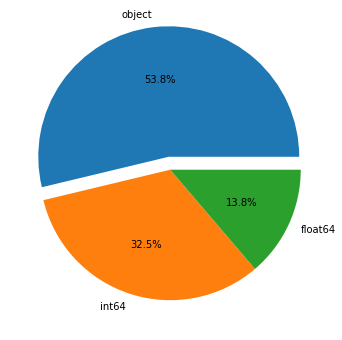

[43, 26, 11]


In [395]:
dtypes = ['object', 'int64', 'float64']
plt.figure(figsize=(6,6))
plt.pie([len(train.iloc[:, :-1].select_dtypes(include=[x]).columns) for x in dtypes], explode=(0.1, 0, 0), labels=dtypes, autopct='%1.1f%%')
plt.show([len(train.iloc[:, :-1].select_dtypes(include=[x]).columns) for x in dtypes])
print([len(train.iloc[:, :-1].select_dtypes(include=[x]).columns) for x in dtypes])

> 80개의 속성은 object 43개, int 26개, float 11개로 구성되어있다.

> data_description을 확인한 결과 <br>
MSSUbClass처럼 int형이지만 Categorical한 값을 뜻하거나, Object(문자열)이지만 순서가 있는 속성들이 있었다. <br>
그리고 지하실(Basement)이나 마당(Garage), 수영장(Pool), 울타리(Fence) 속성들은 없다는 것(None)이 NA로 표현되어 있었다.

## 시각화
## 반응 변수 (SalePrice)

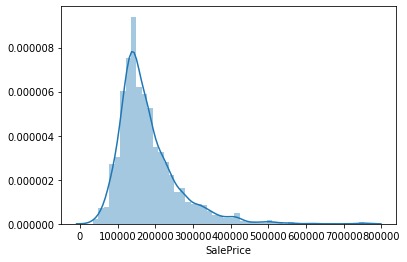

In [396]:
sns.distplot(train['SalePrice'])

In [397]:
train['SalePrice'] = np.log1p(train['SalePrice'])

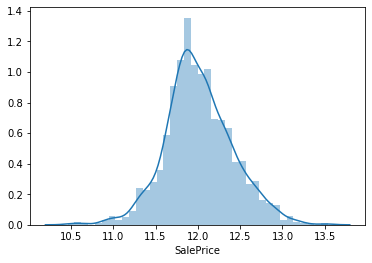

In [398]:
sns.distplot(train['SalePrice'])

> 훈련에서 사용할 SalePrice는 전체적으로 왼쪽에 치우쳐있고, 첨도가 높은 것을 확인할 수 있었습니다. <br>
집값은 범위가 매우 넓게 나타나지만, 대다수의 집들은 일정 범위 안에 주로 분포하기 때문에 왜도가 높은 것으로 보여집니다. <br>
이 때 높은 가격대에서의 조그만 가격 차이가 낮은 가격대에서는 매우 크게 나타나 결과에 영향을 줄 수 있기 떄문에 <br>
로그 함수를 사용하여 정규분포에 가깝게 만들었습니다.

## 수치형 변수들 (int, float)

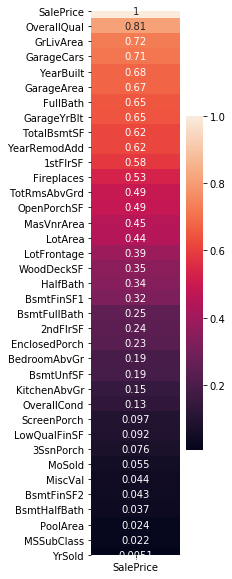

In [399]:
plt.figure(figsize=(2,10))
sns.heatmap(abs(train[train.iloc[:, 1:].select_dtypes(include=['int64','float64']).columns].corr(method='spearman')).iloc[-1:].T.sort_values('SalePrice', ascending=False), annot=True)

> 상관관계 분석을 위해 두 값이 같이 증가, 감소하는지를 평가하는 spearman 상관관계를 사용했습니다.

## OverallQual (상관관계 81%)
> 집의 특성으로 사용된 자재와 마감재의 비율 <br>
(1 Very Poor ~ 10 Very Excellent)

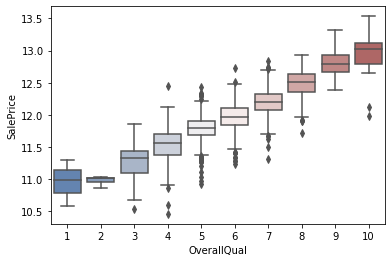

In [400]:
sns.boxplot(x="OverallQual", y="SalePrice", data=train, palette="vlag")

> OverallQual 값이 높아질수록 집값도 증가하는 것을 볼 수 있습니다. <br>


## GrLivArea (상관관계 72%)
> 거실의 크기 (feet^2) <br>
(334 ~ 5642)

In [401]:
train['GrLivArea'].describe()

count    1751.000000
mean     1503.853227
std       507.481197
min       334.000000
25%      1126.500000
50%      1456.000000
75%      1759.500000
max      5642.000000
Name: GrLivArea, dtype: float64

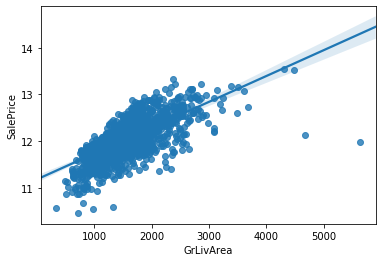

In [402]:
sns.regplot(x=train["GrLivArea"], y=train["SalePrice"])
plt.show()

> 몇 개의 이상치를 제외하고 전체적으로 증가하는 것을 볼 수 있습니다.

## GarageCars (상관관계 71%)
> 차고에 넣을 수 있는 자동차의 수 <br>
(1 ~ 5)

In [403]:
train['GarageCars'].describe()

count    1750.000000
mean        1.766286
std         0.767184
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

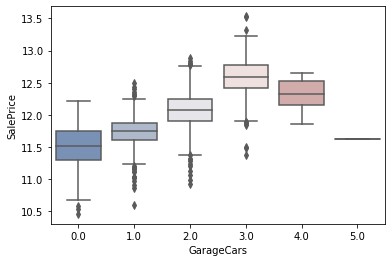

In [404]:
sns.boxplot(x="GarageCars", y="SalePrice", data=train, palette="vlag")
plt.show()

## YearBuilt (상관관계 68%)
> 건축년도

In [405]:
train['YearBuilt'].describe()

count    1751.000000
mean     1971.246716
std        30.254269
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

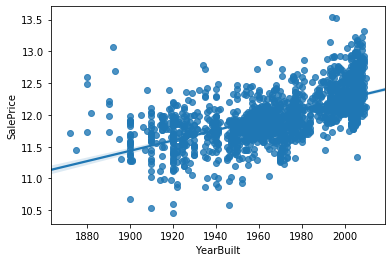

In [406]:
sns.regplot(x=train["YearBuilt"], y=train["SalePrice"])
plt.show()

## GarageArea (상관관계 67%)
> 차고의 크기 (feet^2)

In [407]:
train['GarageArea'].describe()

count    1750.000000
mean      473.284000
std       216.749436
min         0.000000
25%       324.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

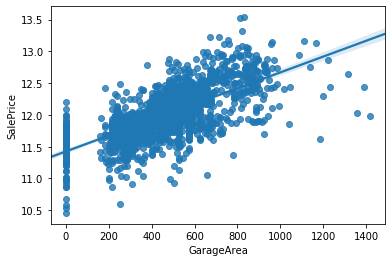

In [408]:
sns.regplot(x=train["GarageArea"], y=train["SalePrice"])
plt.show()

## FullBath (상관관계 65%)
> 지상층에 있는 완전한 화장실의 수

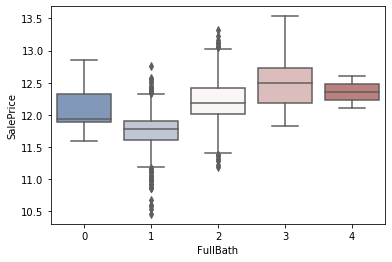

In [409]:
sns.boxplot(x="FullBath", y="SalePrice", data=train, palette="vlag")
plt.show()

## GarageYrBlt (상관관계 62%)
> 차고 건축년도

In [410]:
train['GarageYrBlt'].describe()

count    1651.000000
mean     1977.857056
std        25.177410
min      1896.000000
25%      1961.000000
50%      1979.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

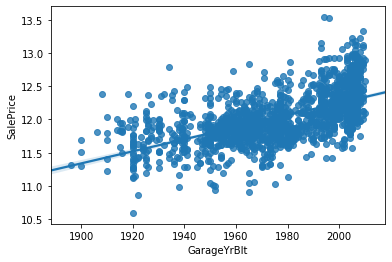

In [411]:
sns.regplot(x=train["GarageYrBlt"], y=train["SalePrice"])
plt.show()

## TotalBsmtSF (상관관계 62%)
> 지하실 총면적 (feet^2)

In [412]:
train['TotalBsmtSF'].describe()

count    1750.000000
mean     1045.835429
std       444.493230
min         0.000000
25%       792.250000
50%       980.000000
75%      1295.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

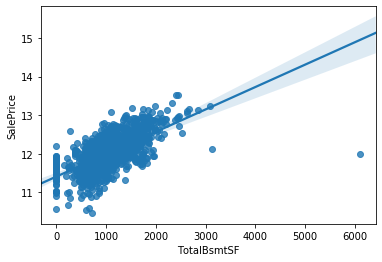

In [413]:
sns.regplot(x=train["TotalBsmtSF"], y=train["SalePrice"])
plt.show()

## 1stFlrSF (상관관계 58%)
> 1층 면적 (feet^2)

In [414]:
train['1stFlrSF'].describe()

count    1751.000000
mean     1156.943461
std       391.702769
min       334.000000
25%       868.000000
50%      1074.000000
75%      1393.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64

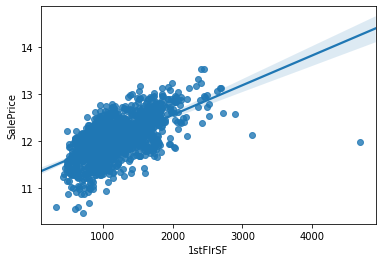

In [415]:
sns.regplot(x=train["1stFlrSF"], y=train["SalePrice"])
plt.show()

## Fireplaces (상관관계 53%)
> 벽난로의 수

In [416]:
train['Fireplaces'].describe()

count    1751.000000
mean        0.589377
std         0.637747
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

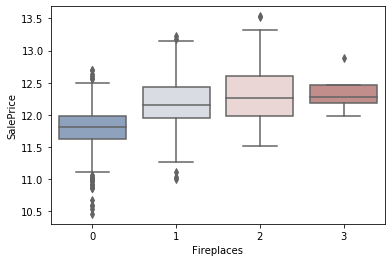

In [417]:
sns.boxplot(x="Fireplaces", y="SalePrice", data=train, palette="vlag")
plt.show()

## TotRmsAbvGrd (상관관계 49%)
> 지상층에 있는 방의 수

In [418]:
train['TotRmsAbvGrd'].describe()

count    1751.000000
mean        6.467162
std         1.554691
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        13.000000
Name: TotRmsAbvGrd, dtype: float64

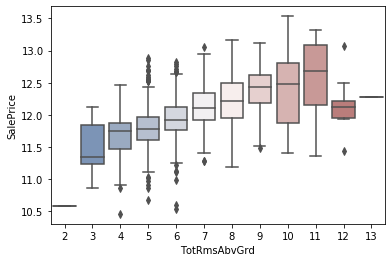

In [419]:
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=train, palette="vlag")
plt.show()

## OpenPorchSF (상관관계 49%)
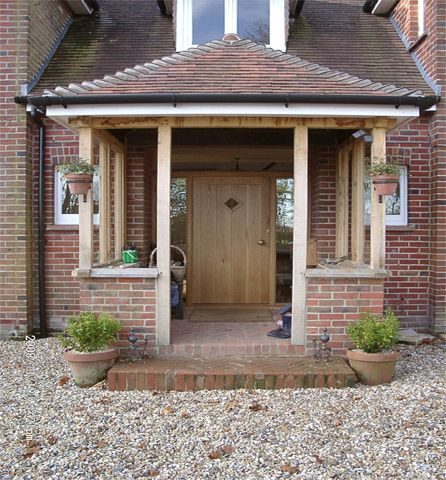

In [420]:
train['OpenPorchSF'].describe()

count    1751.000000
mean       47.834380
std        68.413975
min         0.000000
25%         0.000000
50%        26.000000
75%        70.000000
max       742.000000
Name: OpenPorchSF, dtype: float64

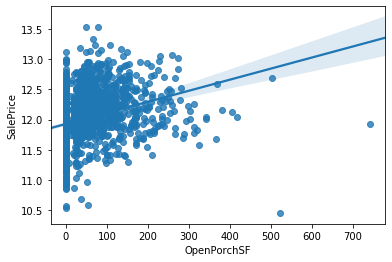

In [421]:
sns.regplot(x=train["OpenPorchSF"], y=train["SalePrice"])
plt.show()

## MasVnrArea (상관관계 45%)
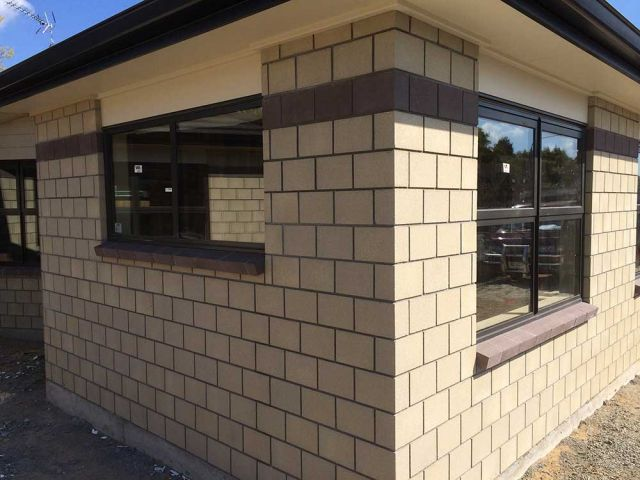

In [422]:
train['MasVnrArea'].describe()

count    1735.000000
mean      101.257061
std       176.619629
min         0.000000
25%         0.000000
50%         0.000000
75%       166.500000
max      1600.000000
Name: MasVnrArea, dtype: float64

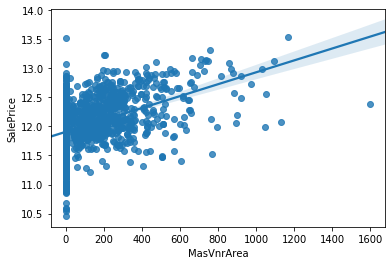

In [423]:
sns.regplot(x=train["MasVnrArea"], y=train["SalePrice"])
plt.show()

## LotArea (상관관계 44%)
> 대지 면적

In [424]:
train['LotArea'].describe()

count      1751.000000
mean      10346.648772
std        8656.267180
min        1300.000000
25%        7500.000000
50%        9541.000000
75%       11708.500000
max      215245.000000
Name: LotArea, dtype: float64

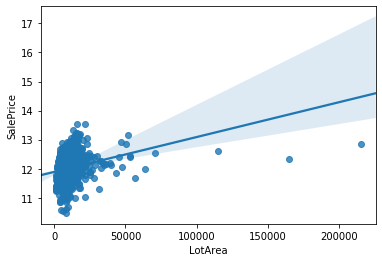

In [425]:
sns.regplot(x=train["LotArea"], y=train["SalePrice"])
plt.show()

## 범주형 변수

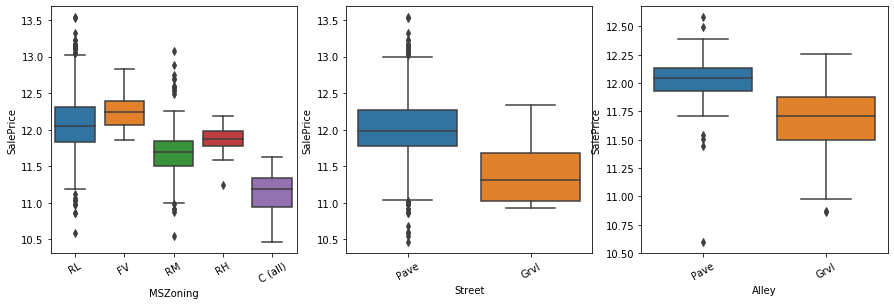

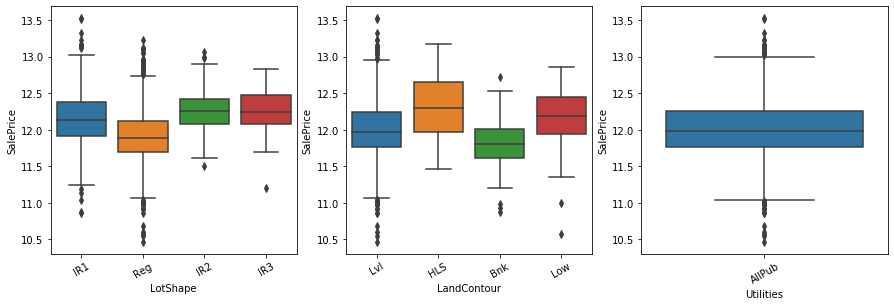

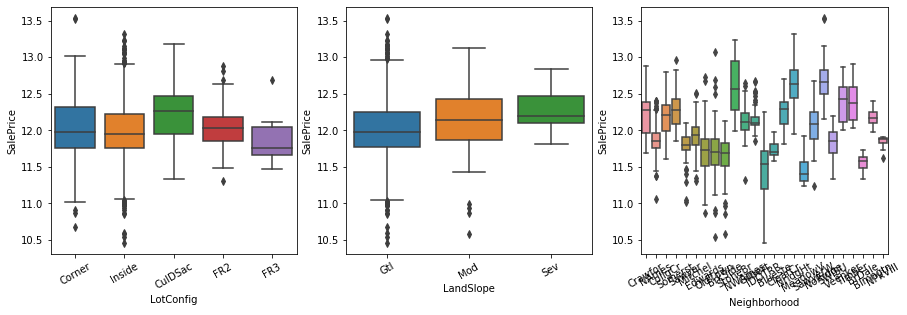

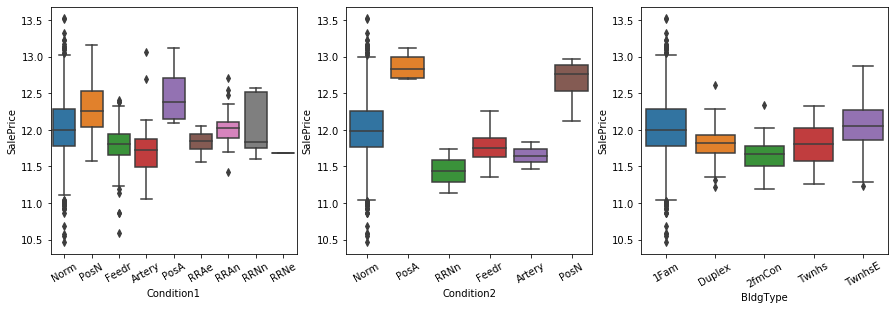

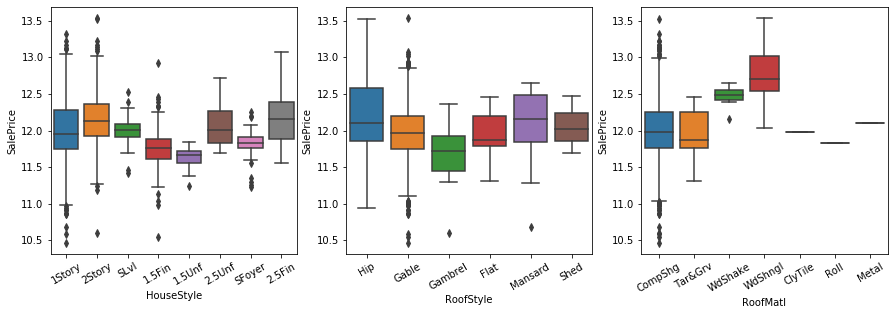

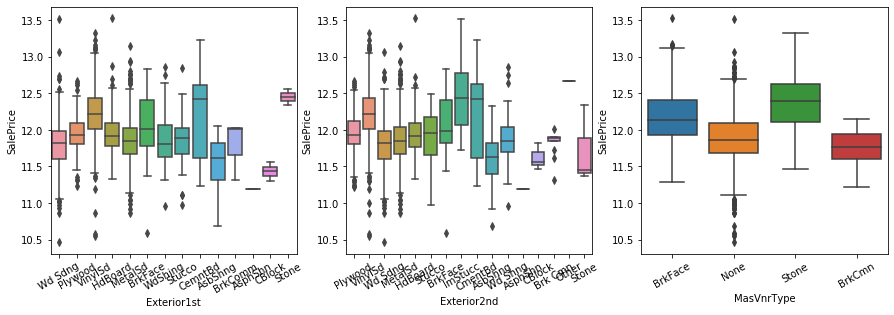

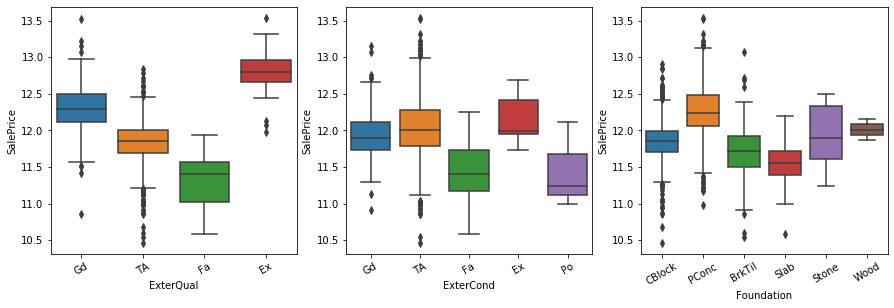

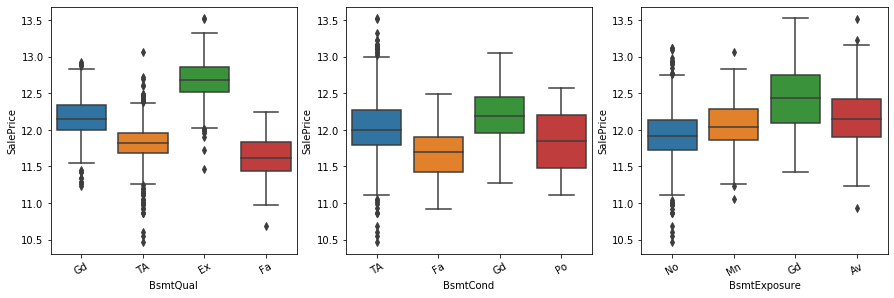

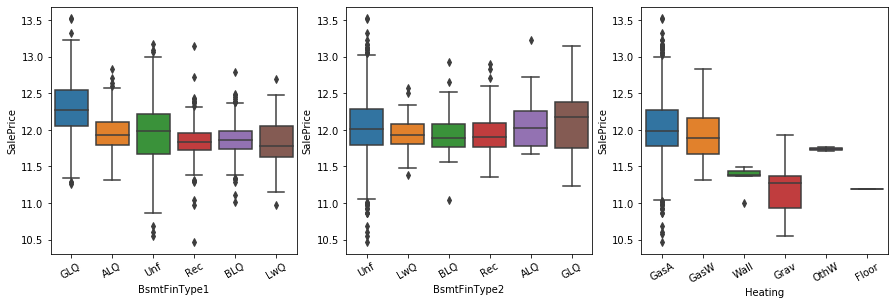

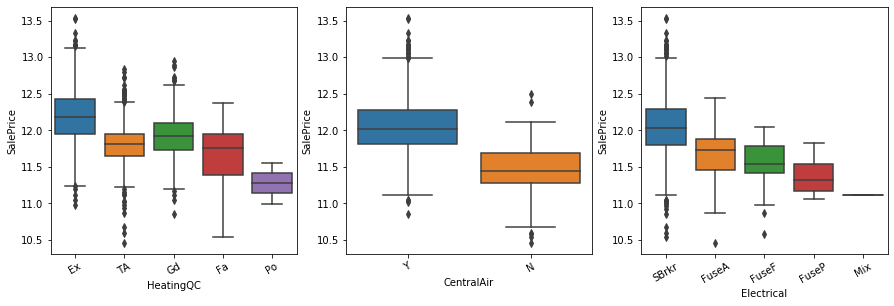

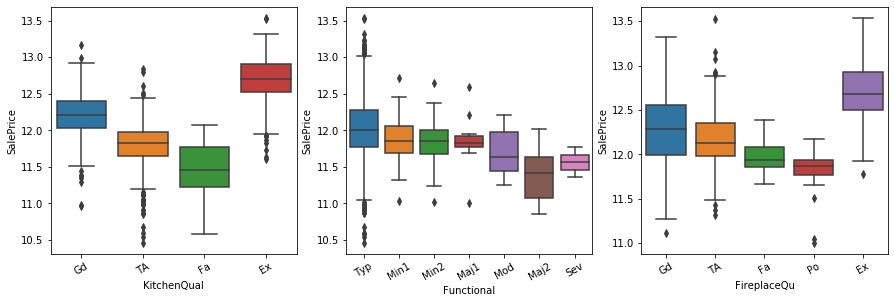

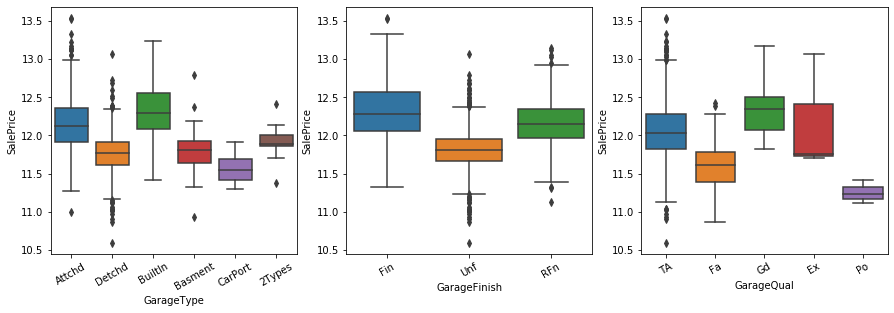

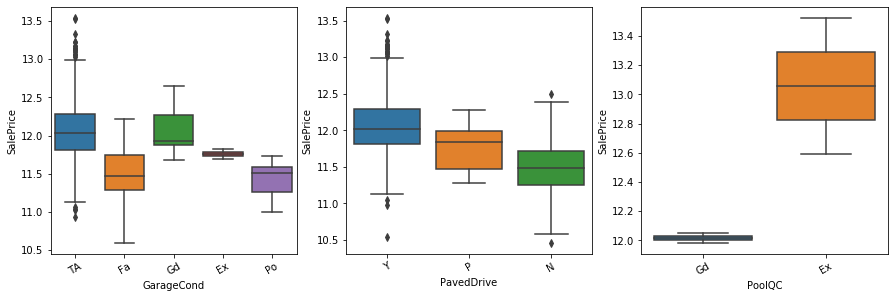

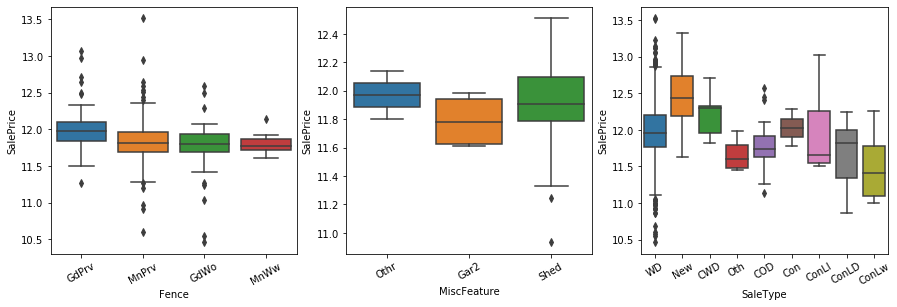

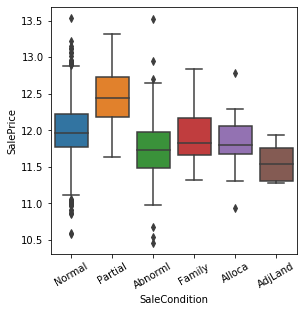

In [426]:
categorical_features = train.select_dtypes(include = ["object"]).columns

ix = 1
fig = plt.figure(figsize = (15,10))
for c in categorical_features:
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=train, x=c, y='SalePrice', ax=ax2)
            ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

- 범주형 속성들 중 MSZoning이나 재료에 대한 속성을 뜻하는 몇몇은 속성값들 사이에 우열이 있는 것을 볼 수 있었습니다.
- condition이나 quality 가 들어가는 속성들은 등급으로 구성되어 있는 것을 확인할 수 있었습니다.

## 결측치 확인

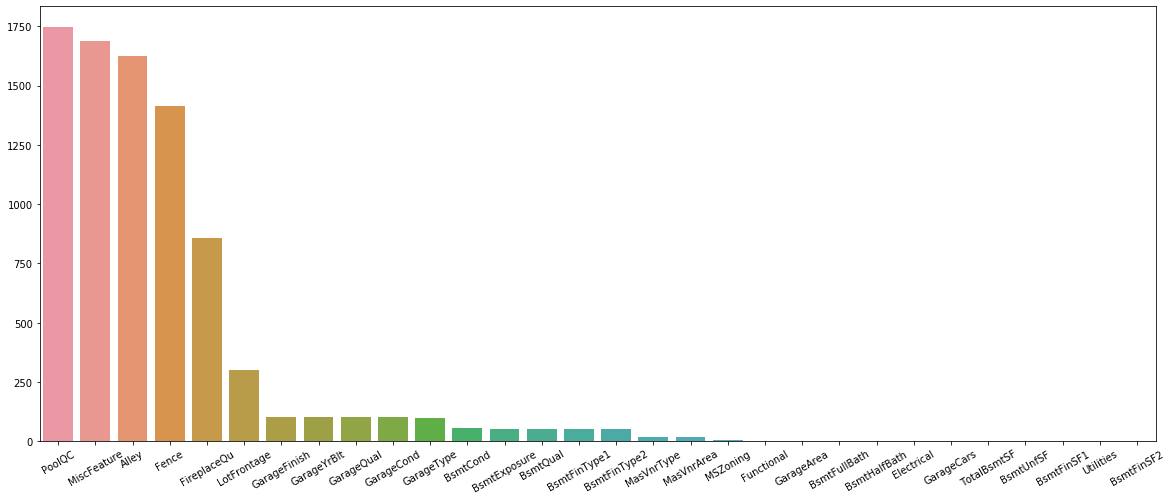

In [427]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x = train.isnull().sum().sort_values(ascending=False).index[:30], y=train.isnull().sum().sort_values(ascending=False).values[:30])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

> 결측치 확인 결과 PoolQC, MiscFeature, Alley, Fence는 결측치가 많은 것을 알 수 있었고, <br>
GarageFinish ~ GarageType과 BsmtCond ~ BsmtFinType2 구간의 결측치가 비슷한 것으로 보아 이 속성들 간의 상관관계가 있을 것으로 생각할 수 있습니다.

## Train 데이터와 Test 데이터 비교

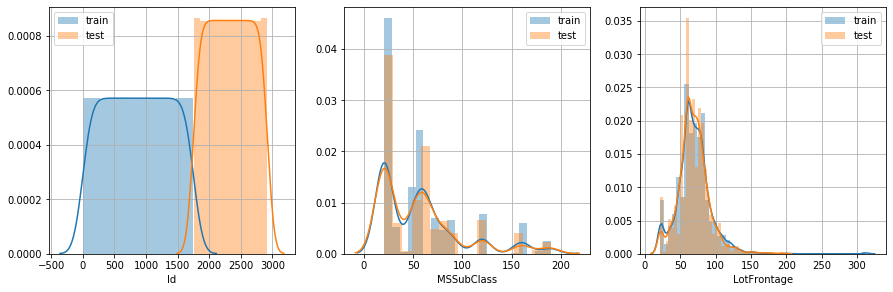

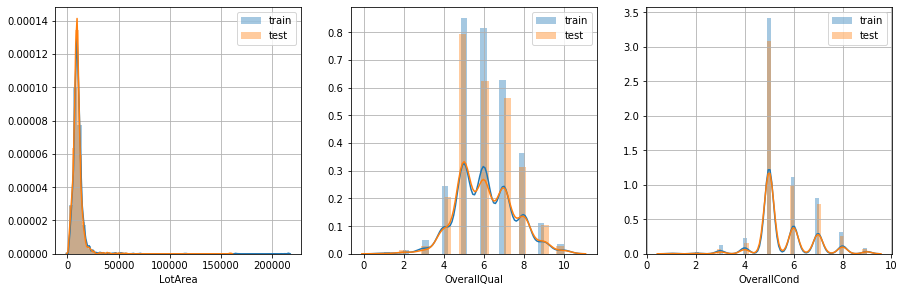

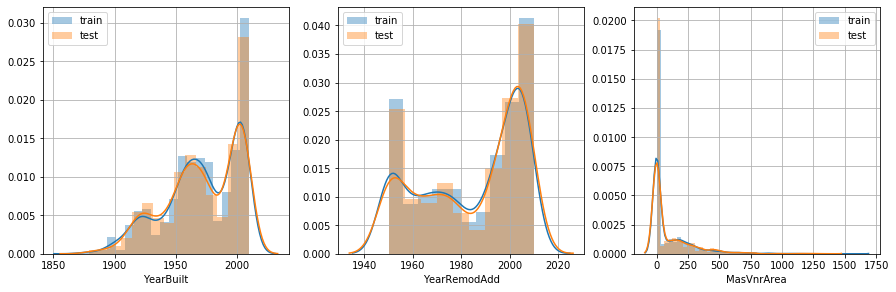

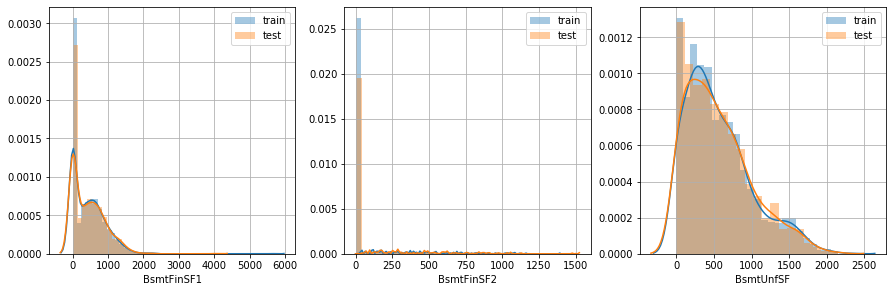

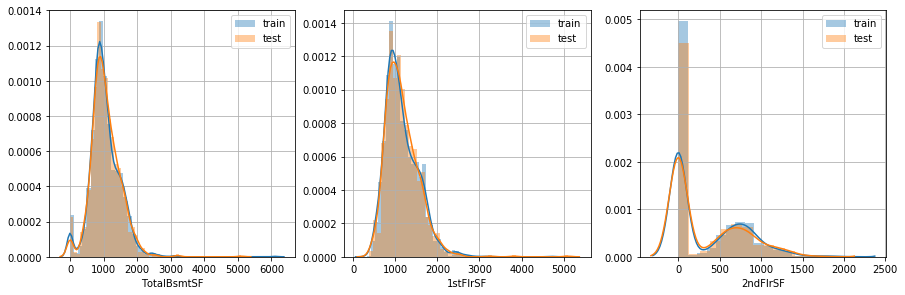

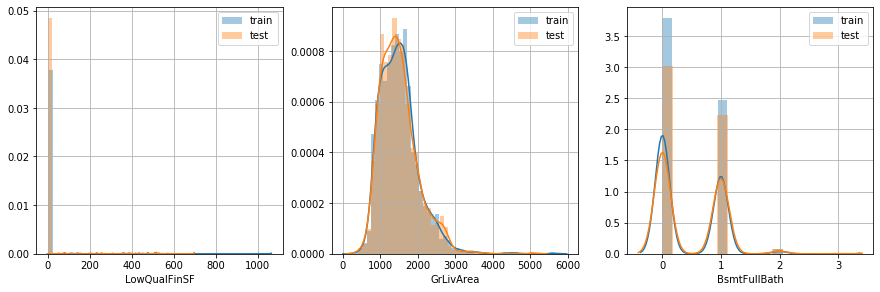

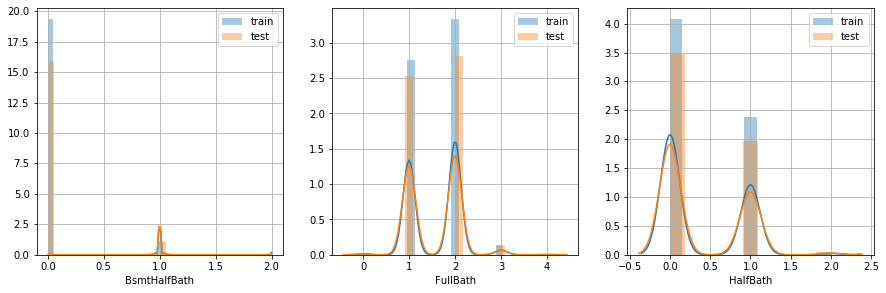

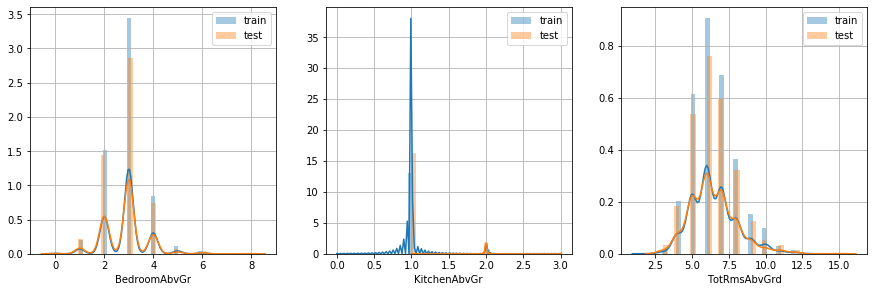

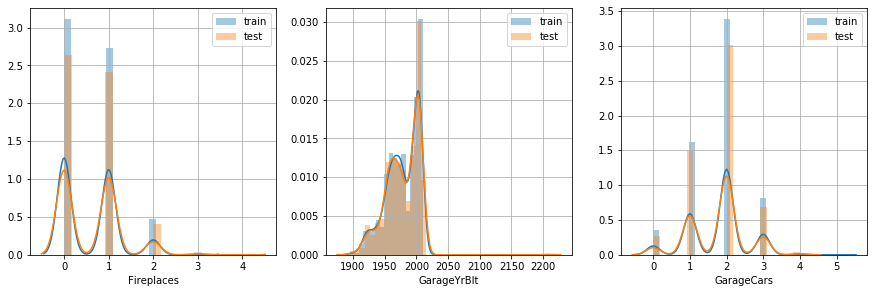

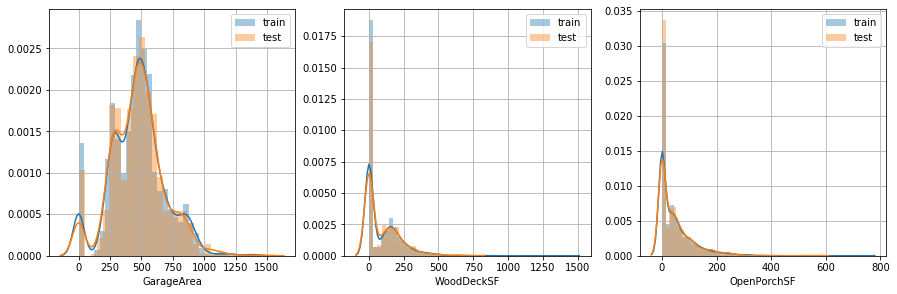

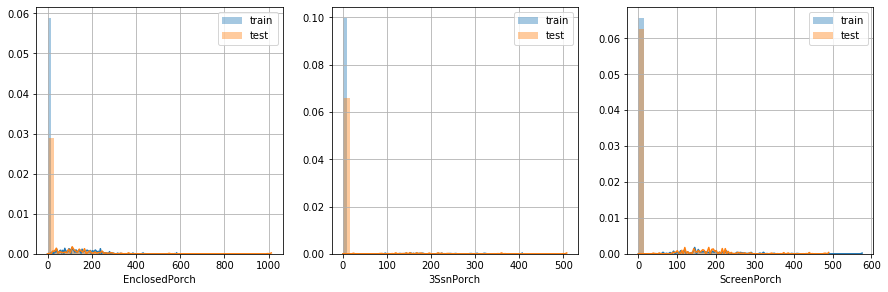

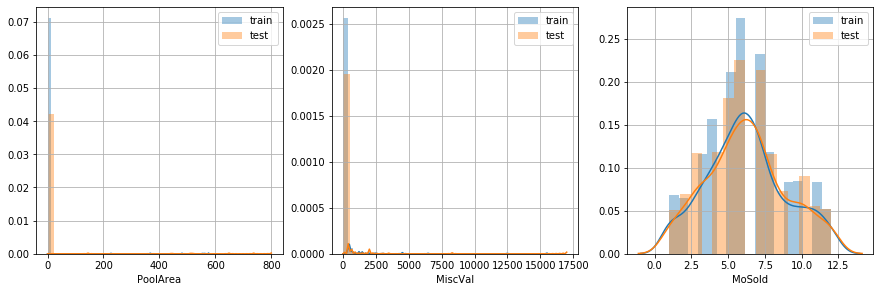

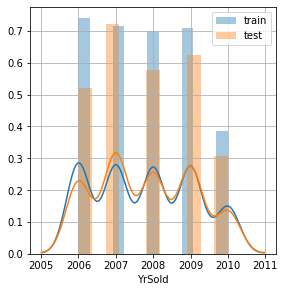

In [428]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(train.select_dtypes(include = ["int64","float64"]).columns[:-1]):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(train[c].dropna())
            sns.distplot(test[c].dropna())
            plt.legend(['train', 'test'])
            plt.grid()            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

> Train 데이터와 Test 데이터의 분포가 유사하기 때문에 Train 데이터로 훈련된 모델로 Test 데이터의 결과를 예측할 수 있을 것이라고 생각됩니다.

## Data 전처리
### 이상치 제거

## SalePrice

In [429]:
train['SalePrice'].describe()

count    1751.000000
mean       12.014076
std         0.399661
min        10.460271
25%        11.767575
50%        11.979392
75%        12.261575
max        13.534474
Name: SalePrice, dtype: float64

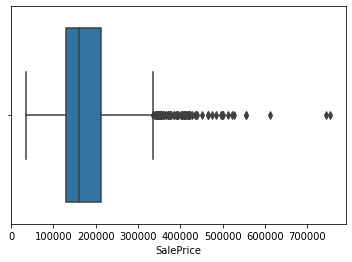

In [430]:
sns.boxplot(np.expm1(train['SalePrice']))

In [431]:
train['SalePrice'][np.expm1(train['SalePrice']) > 700000]

349    13.534474
932    13.521141
Name: SalePrice, dtype: float64

In [432]:
train = train[train['Id'] != 933]
train = train[train['Id'] != 350]

In [433]:
train['SalePrice'].describe()

count    1749.000000
mean       12.012345
std         0.396594
min        10.460271
25%        11.767575
50%        11.978064
75%        12.259811
max        13.323929
Name: SalePrice, dtype: float64

## GrLivArea

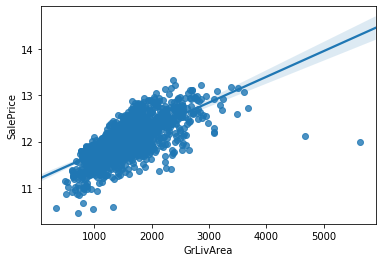

In [434]:
sns.regplot(x=train["GrLivArea"], y=train["SalePrice"])
plt.show()

In [435]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<12.5)].index)

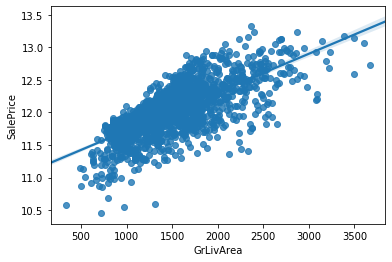

In [436]:
sns.regplot(x=train["GrLivArea"], y=train["SalePrice"])
plt.show()

## LotArea

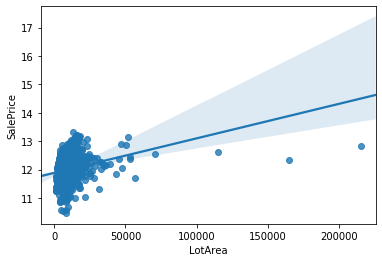

In [437]:
sns.regplot(x=train["LotArea"], y=train["SalePrice"])
plt.show()

In [438]:
train = train.drop(train[(train['LotArea']>150000)].index)

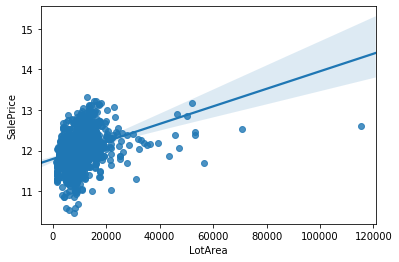

In [439]:
sns.regplot(x=train["LotArea"], y=train["SalePrice"])
plt.show()

## GarageArea

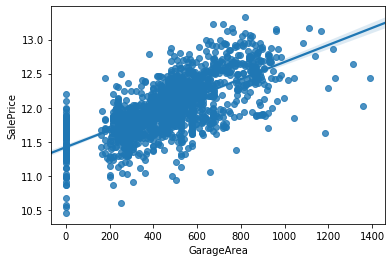

In [440]:
sns.regplot(x=train["GarageArea"], y=train["SalePrice"])
plt.show()

In [441]:
train = train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<12.5)].index)

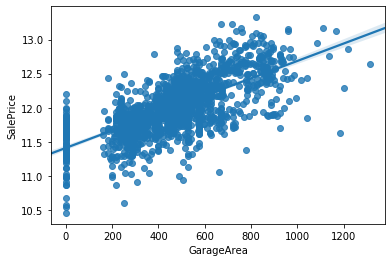

In [442]:
sns.regplot(x=train["GarageArea"], y=train["SalePrice"])
plt.show()

## TotalBsmtSF

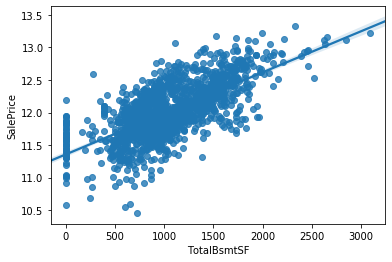

In [443]:
sns.regplot(x=train["TotalBsmtSF"], y=train["SalePrice"])
plt.show()

In [444]:
train = train.drop(train[(train['TotalBsmtSF']>5000)].index)

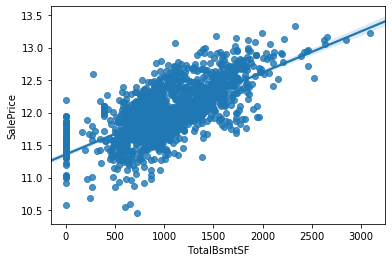

In [445]:
sns.regplot(x=train["TotalBsmtSF"], y=train["SalePrice"])
plt.show()

- 앞의 이상치 제거과정 중 제거된 것으로 보임

## OpenPorchSF

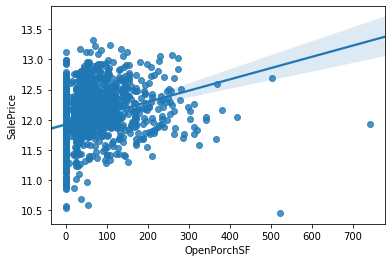

In [446]:
sns.regplot(x=train["OpenPorchSF"], y=train["SalePrice"])
plt.show()

In [447]:
train = train.drop(train[(train['OpenPorchSF']>500) & (train['SalePrice']<12.3)].index)

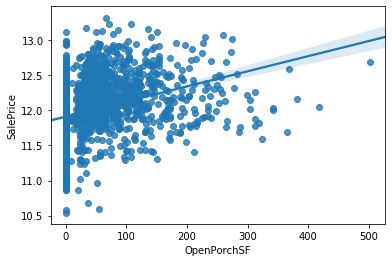

In [448]:
sns.regplot(x=train["OpenPorchSF"], y=train["SalePrice"])
plt.show()

### 결측치 처리

In [449]:
data_all = pd.concat([train.iloc[:, :-1], test], sort=False)

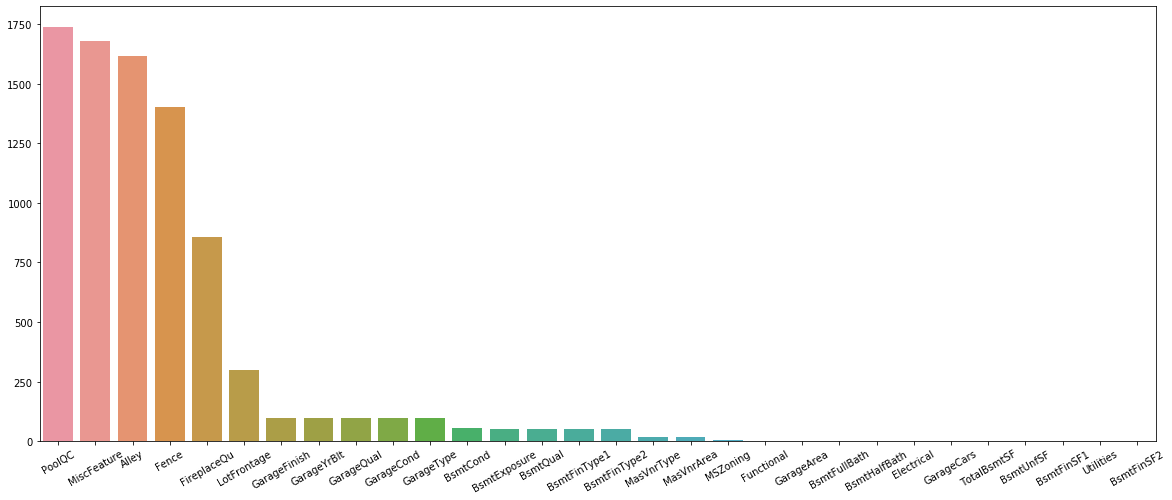

In [450]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x = train.isnull().sum().sort_values(ascending=False).index[:30], y=train.isnull().sum().sort_values(ascending=False).values[:30])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

In [451]:
data_all.isnull().sum().sort_values(ascending=False)[:36]

PoolQC          2900
MiscFeature     2805
Alley           2710
Fence           2339
FireplaceQu     1417
LotFrontage      484
GarageCond       157
GarageQual       157
GarageYrBlt      157
GarageFinish     157
GarageType       155
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
Exterior2nd        1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
dtype: int64

In [452]:
data_all["PoolQC"] = data_all["PoolQC"].fillna("None")
data_all["MiscFeature"] = data_all["MiscFeature"].fillna("None")
data_all["Alley"] = data_all["Alley"].fillna("None")
data_all["Fence"] = data_all["Fence"].fillna("None")
data_all["FireplaceQu"] = data_all["FireplaceQu"].fillna("None")
data_all['BsmtQual'] = data_all['BsmtQual'].fillna('None')
data_all['BsmtCond'] = data_all['BsmtCond'].fillna('None')
data_all['BsmtExposure'] = data_all['BsmtExposure'].fillna('None')
data_all['BsmtFinType1'] = data_all['BsmtFinType1'].fillna('None')
data_all['BsmtFinType2'] = data_all['BsmtFinType2'].fillna('None')
data_all['GarageType'] = data_all['GarageType'].fillna('None')
data_all['GarageFinish'] = data_all['GarageFinish'].fillna('None')
data_all['GarageQual'] = data_all['GarageQual'].fillna('None')
data_all['GarageCond'] = data_all['GarageCond'].fillna('None')

- 범주형 결측치들 중 Bsmt(지하실)와 Garage(차고) 관련된 속성들과 Pool(수영장), MiscFeature(기타 특징), Alley(골목), Fence(울타리), Fireplace(벽난로)들의 경우 없는 집에서는 NA(값이 없음=null)로 나타나기 때문에 None이라는 값으로 대체했습니다.

In [453]:
data_all.isnull().sum().sort_values(ascending=False)[:25]

LotFrontage     484
GarageYrBlt     157
MasVnrType       24
MasVnrArea       23
MSZoning          4
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
Utilities         2
BsmtFinSF1        1
Exterior1st       1
Exterior2nd       1
GarageCars        1
GarageArea        1
KitchenQual       1
Electrical        1
SaleType          1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
ExterQual         0
RoofStyle         0
Foundation        0
BsmtQual          0
BsmtCond          0
dtype: int64

In [454]:
data_all['BsmtFinSF1'] = data_all['BsmtFinSF1'].fillna(0)
data_all['BsmtFinSF2'] = data_all['BsmtFinSF2'].fillna(0)
data_all['BsmtUnfSF'] = data_all['BsmtUnfSF'].fillna(0)
data_all['TotalBsmtSF'] = data_all['TotalBsmtSF'].fillna(0)
data_all['BsmtFullBath'] = data_all['BsmtFullBath'].fillna(0)
data_all['BsmtHalfBath'] = data_all['BsmtHalfBath'].fillna(0)
data_all['MasVnrArea'] = data_all['MasVnrArea'].fillna(0)
data_all['GarageYrBlt'] = data_all['GarageYrBlt'].fillna(0)
data_all['GarageCars'] = data_all['GarageCars'].fillna(0)
data_all['GarageArea'] = data_all['GarageArea'].fillna(0)

- 수치형 결측치 역시 Bsmt(지하실), Garage(차고)의 경우 없는 것이기 때문에 0으로 대체하고, 
- Masonry veneer(외벽) 역시 없는 경우 0으로 대체하였습니다.

In [455]:
data_all.isnull().sum().sort_values(ascending=False)[:13]

LotFrontage    484
MasVnrType      24
MSZoning         4
Functional       2
Utilities        2
SaleType         1
Exterior1st      1
KitchenQual      1
Electrical       1
Exterior2nd      1
ExterCond        0
MasVnrArea       0
ExterQual        0
dtype: int64

In [456]:
data_all['MSZoning'] = data_all['MSZoning'].fillna(data_all['MSZoning'].mode()[0])
data_all['Exterior1st'] = data_all['Exterior1st'].fillna(data_all['Exterior1st'].mode()[0])
data_all['Exterior2nd'] = data_all['Exterior2nd'].fillna(data_all['Exterior2nd'].mode()[0])
data_all['MasVnrType'] = data_all['MasVnrType'].fillna(data_all['MasVnrType'].mode()[0])
data_all['Electrical'] = data_all['Electrical'].fillna(data_all['Electrical'].mode()[0])
data_all['KitchenQual'] = data_all['KitchenQual'].fillna(data_all['KitchenQual'].mode()[0])
data_all['Functional'] = data_all['Functional'].fillna(data_all['Functional'].mode()[0])
data_all['SaleType'] = data_all['SaleType'].fillna(data_all['SaleType'].mode()[0])

In [457]:
data_all.isnull().sum().sort_values(ascending=False)[:3]

LotFrontage    484
Utilities        2
BsmtQual         0
dtype: int64

In [458]:
data_all['Utilities'].value_counts()

AllPub    2905
NoSeWa       1
Name: Utilities, dtype: int64

In [459]:
del data_all['Utilities']

- Utilities의 경우 대부분의 값이 AllPub이기 때문에 사용하지 않았습니다.

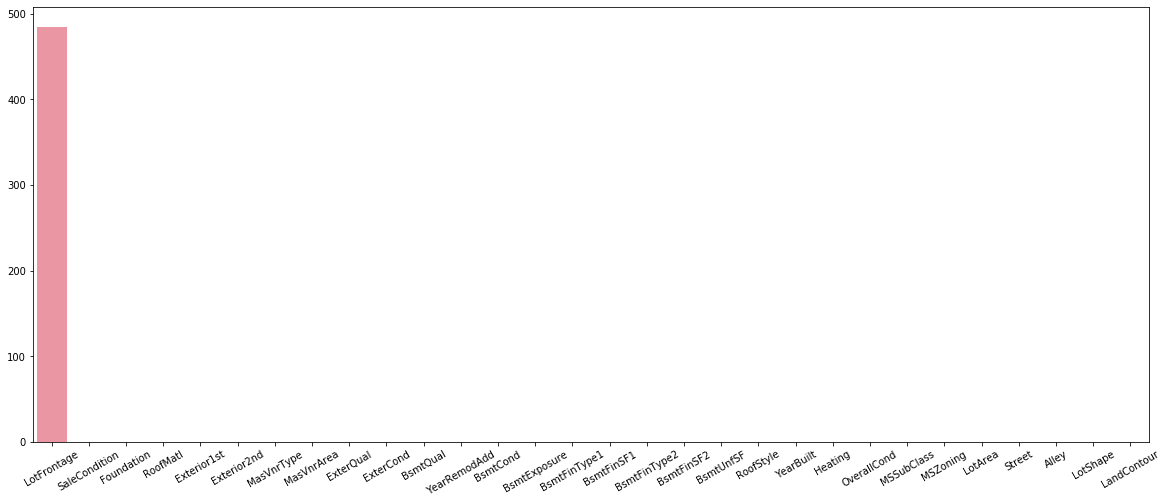

In [460]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x = data_all.isnull().sum().sort_values(ascending=False).index[:30], y=data_all.isnull().sum().sort_values(ascending=False).values[:30])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

## LotFrontage
> Linear feet of street connected to property
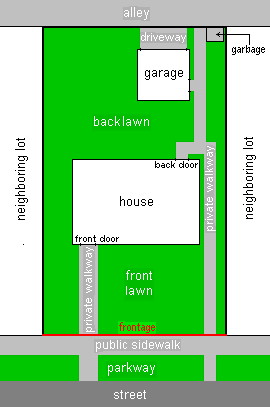

- Frontage를 구하는 방법을 알 수 없어서 평균값으로 대체하였습니다.

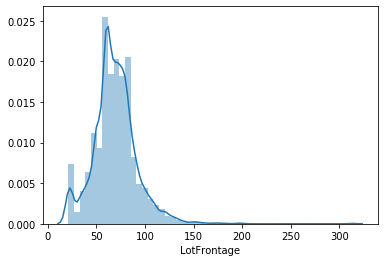

In [461]:
sns.distplot(data_all['LotFrontage'][data_all['LotFrontage'].notnull()])

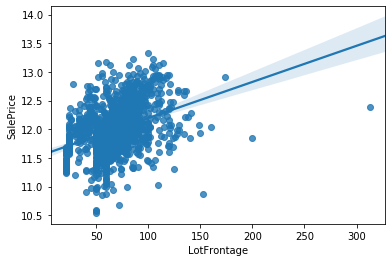

In [462]:
sns.regplot(x=train["LotFrontage"], y=train["SalePrice"])
plt.show()

In [466]:
data_all['LotFrontage'].describe()

count    2424.000000
mean       69.082508
std        22.666320
min        21.000000
25%        58.750000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [467]:
data_all['LotFrontage'].fillna(data_all['LotFrontage'].mean(), inplace=True)

In [468]:
data_all.isnull().sum()[data_all.isnull().sum() > 0]

Series([], dtype: int64)

In [469]:
data_all.isnull().sum().value_counts()

0    79
dtype: int64

## 범주형 변수 Encoding
### One-Hot-Encoding 적용

In [470]:
data_all['MSSubClass'] = data_all['MSSubClass'].apply(str)
data_all['OverallCond'] = data_all['OverallCond'].astype(str)

- 숫자로 된 범주형 변수를 문자열 형태로 형변환

In [471]:
data_all.shape

(2908, 79)

In [472]:
ohe = pd.get_dummies(data_all)
ohe.shape

(2908, 323)

In [473]:
ohe.iloc[:,200:210].head()

,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0


## 비슷한 속성들
- 집 면적과 관련되는 속성들 (BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFirSF)<br>
(TotalBsmtSF는 BsmtFinSF1, BsmtFinSF2, BsmtUnfSF의 합)
- 화장실과 관련된 속성들 (FullBath, HalfBath, BsmtFullBath, BsmtHalfBath)
- Porch(현관)와 관련된 속성들 (OpenPorchSF, 3SsnPorch, EnclosedPorch, ScreenPorch, WoodDeckSF)

## SalePrice와 상관도가 높은 값
- GrLivArea, OverallQual

## Feature Engineering
- Total_House_Area = TotalBsmtSF + 1stFlrSF + 2ndFirSF
- Total_Porch = OpenPorchSF + 3SsnPorch + EnclosedPorch + ScreenPorch + WoodDeckSF
- Total_Bath = FullBath + HalfBath + BsmtFullBath + BsmtHalfBat
- GrLivAreaxOverallQual = GrLivArea * OverallQual

In [474]:
train[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].head(10)

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,808.0,0.0,72.0,880.0
1,282.0,35.0,664.0,981.0
2,922.0,0.0,572.0,1494.0
3,0.0,0.0,569.0,569.0
4,570.0,0.0,891.0,1461.0
5,936.0,396.0,396.0,1728.0
6,0.0,0.0,1234.0,1234.0
7,110.0,442.0,312.0,864.0
8,528.0,0.0,480.0,1008.0
9,271.0,0.0,30.0,301.0


In [475]:
ohe['Total_Bathrooms'] = ohe['FullBath'] + ohe['HalfBath'] + ohe['BsmtFullBath'] + ohe['BsmtHalfBath']
ohe['Total_Porch'] = ohe['OpenPorchSF'] + ohe['3SsnPorch'] + ohe['EnclosedPorch'] + ohe['ScreenPorch'] + ohe['WoodDeckSF'] 
ohe['Total_House'] = ohe['TotalBsmtSF'] + ohe['1stFlrSF'] + ohe['2ndFlrSF']
ohe['GrLivAreaxOverallQual'] = ohe['GrLivArea'] * ohe['OverallQual']

## SalePrice 분리, Id열 삭제

In [476]:
y_reg = train[['SalePrice']]
Id = test['Id']
del data_all['Id']

## LightGBM

In [477]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
import time # 실행시간 측정 위한 패키지

In [478]:
train = ohe[:len(y_reg)]
test = ohe[len(y_reg):]

In [479]:
X_train, X_test, y_train, y_test = train_test_split(train, y_reg, test_size=0.3, random_state=1)

params = {"learning_rate" : 0.1,
          "max_depth" : 8,
          "bagging_fraction" : 1,
          'feature_fraction' : 0.5,
          'max_depth': 6,
          'objective': 'regression', 
          'boosting_type': 'gbdt',
          'metric' : {'rmse'},
          'verbose' : 0,
          'early_stopping_round': 20
         }

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)
watch_list = [lgb_eval]

s = time.time()
clf = lgb.train(params, lgb_train, 100, watch_list, verbose_eval=0)
print("Spent {:1f} Seconds".format(time.time() - s))

Spent 0.150999 Seconds


C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [480]:
importances = pd.DataFrame({"Feature":train.columns, "Imps":clf.feature_importance()}).sort_values(by="Imps", ascending=False)
# 중요도가 0 이상인 변수명만 담긴 List 만든 뒤
impFeatures = list(importances[importances.Imps != 0].Feature)
# 윗 컬럼으로만 이루어진 테이블 만들기
train = train[impFeatures]
test = test[impFeatures]

train.shape, test.shape

((1740, 143), (1168, 143))

In [481]:
X_train, X_test, y_train, y_test = train_test_split(train, y_reg, test_size=0.3, random_state=1)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)
        
pred_test = pd.DataFrame(test.index)
parameters = pd.DataFrame({
    "1Learning_rate":[0],
    "2max_depth":[0],
    "3feature_fraction" : [0],
    "4num_leaves" : [0],
    "5min_data_leaf" : [0],
    "6MSE":[0]})

learning_rate = [0.1, 0.15, 0.2]
max_depth = [4, 6, 8]
feature_fraction = [0.4,0.6,0.8,1]

mse = 10000000

for lr in learning_rate:
    for depth in max_depth:
        for fraction in feature_fraction:
            
            max_leaves = 2**depth
            num_leaves = [max_leaves, int(max_leaves*0.8), int(max_leaves*0.5) ]
            
            for leaves in num_leaves:
                params = {"learning_rate" : lr,
                          "max_depth" : depth,
                          "bagging_fraction" : 1,
                          'feature_fraction' : fraction,
                          'objective': 'regression', 
                          'num_leaves' : leaves,
                          'boosting_type': 'gbdt',
                          'metric' : {'rmse'},
                          'verbose' : 1}
                
                s = time.time()
                clf = lgb.train(params, lgb_train, num_boost_round=3000, valid_sets=lgb_eval, early_stopping_rounds=100, verbose_eval=0)
                print(time.time() - s)

                r = pd.DataFrame({
                    "1Learning_rate":[lr],
                    "2max_depth":[depth],
                    "3feature_fraction" : [fraction],
                    "4num_leaves" : [leaves],
                    "5AUC" : mean_squared_error(y_test,clf.predict(X_test))
                })
                
                parameters = r.append(parameters, sort=False)            
                tmp = mean_squared_error(y_test,clf.predict(X_test))
                if tmp < mse:
                    mse = tmp
                    print("Best Parameters : LR {}, depth {}, fractions {}, leaves {}, MSE {:6f}"
                             .format(lr, depth, fraction, leaves, mean_squared_error(y_test,clf.predict(X_test))))

0.14599967002868652
Best Parameters : LR 0.1, depth 4, fractions 0.4, leaves 16, MSE 0.008965
0.09400033950805664
0.24000072479248047
Best Parameters : LR 0.1, depth 4, fractions 0.4, leaves 8, MSE 0.008314
0.11400198936462402
0.14299941062927246
0.10100007057189941
0.12400031089782715
0.24699854850769043
0.14999985694885254
0.1250002384185791
0.13100075721740723
0.09600043296813965
0.127000093460083
0.12200021743774414
0.1379997730255127
0.1770009994506836
0.1900005340576172
0.11299896240234375
0.1979997158050537
0.2220010757446289
0.18700051307678223
0.20400142669677734
0.19700002670288086
0.2689981460571289
0.20599961280822754
0.17300009727478027
0.16500067710876465
0.18199992179870605
0.20200037956237793
0.21500086784362793
0.19100022315979004
0.19099974632263184
0.19100069999694824
0.4310009479522705
0.3530008792877197
0.37400150299072266
0.08400106430053711
0.13900017738342285
0.0690011978149414
0.18500018119812012
0.09600090980529785
0.10199952125549316
0.14500093460083008
0.144

In [488]:
#X_train, X_test, y_train, y_test = train_test_split(train, y_reg, test_size=0.1, random_state=1)

lgb_train = lgb.Dataset(train, y_reg)

params = {"learning_rate" : 0.1,
                  "max_depth" : 4,
                  "bagging_fraction" : 1,
                  'feature_fraction' : 0.4,
                  'num_leaves' : 8,
                  'objective': 'regression',
                  'boosting_type': 'gbdt',
                  'metric' : {'rmse'},
                  'verbose' : 1}

clf = lgb.train(params, lgb_train, num_boost_round=3000, verbose_eval=0)
np.expm1(clf.predict(test))

array([263489.55873957, 126850.31074334, 226159.11145081, ...,
       131866.49494161, 192155.32037993, 123705.13620012])

In [489]:
#pd.DataFrame(Id, np.expm1(clf.predict(test)), columns=[''])
result = pd.concat([Id, pd.DataFrame(np.expm1(clf.predict(test)))], axis=1)
result.columns = ['Id', 'SalePrice']
result.to_csv('./submission1.csv', index=False)